shape=4  length=4528.0  approx=4   area=1255180.0
1769  96986 00

~   조으을

>쏘2

-ㅎ%

   
 

~

슬

0 /  6

    

8


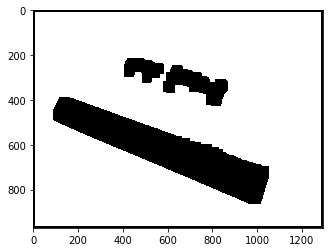

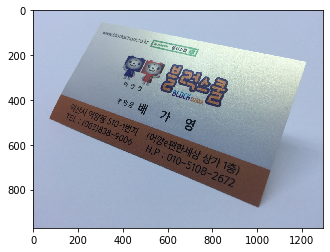

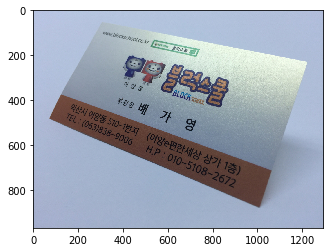

In [16]:
import cv2, numpy as np
import time
import matplotlib.pylab as plt
%matplotlib inline

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def imshow(tit, image) :
    plt.title(tit)
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
    else :
        plt.imshow(image,cmap="gray")
        plt.show()




def ocr(loadimg) :
    img = cv2.imread("img/namecard3.jpg")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_blur = cv2.GaussianBlur(gray, (3,3) , 0)
    _, binary = cv2.threshold(img_blur, 0, 255,
            cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=5)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=10)


    testing = closing.copy()
    contours, _ = cv2.findContours(testing, cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)


    peri_list=[]
    maxArea = 0
    for i in range(len(contours)) :        
        con = contours[i]
        peri = cv2.arcLength(con, True)
        peri_list.append(peri)
        area = cv2.contourArea(con)  
        approx = cv2.approxPolyDP(con, 0.02 * peri, True)    
        print(  f"shape={len(con)}  length={peri}  approx={len(approx)}   area={area}"  )    
        if area > maxArea  :
            maxArea = area
            maxContour = approx

    draw = cv2.drawContours(testing, [maxContour], -1, (0,0,255), 20)
    if len(maxContour) != 4 :
        return '다시 찍어주세요 (사각형이 아님)'


    import math
    def length(p1,p2) :
        result = math.sqrt(  (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2  )
        return result


    height = img.shape[0]
    width = img.shape[1]
    centerpt = [
        (maxContour[0,0,0]+maxContour[1,0,0]+maxContour[2,0,0]+maxContour[3,0,0])/4, 
        (maxContour[0,0,1]+maxContour[1,0,1]+maxContour[2,0,1]+maxContour[3,0,1])/4]

    idx = [  0,1,2,3  ]


    for i in range(4) :
        if maxContour[i,0,0] > centerpt[0] and maxContour[i,0,1] > centerpt[1] :
            idx[3] = i
        elif maxContour[i,0,0] > centerpt[0] and maxContour[i,0,1] < centerpt[1] :
            idx[1] = i
        elif maxContour[i,0,0] < centerpt[0] and maxContour[i,0,1] > centerpt[1] :
            idx[2] = i
        elif maxContour[i,0,0] < centerpt[0] and maxContour[i,0,1] < centerpt[1] :
            idx[0] = i

    pts1 = np.array(approx[idx, 0, :])
    pts1 = np.float32(pts1)


    #좌표순서 - 상단왼쪽 끝, 상단오른쪽 끝, 하단왼쪽 끝, 하단오른쪽 끝
    #point_list = [  maxContour[0,0],maxContour[1,0],maxContour[2,0],maxContour[3,0]  ]
    #point_list.sort(key=lambda x:x[0])


    width = length(pts1[0],pts1[1])
    height = length(pts1[0],pts1[2])



    pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
    
    
    M = cv2.getPerspectiveTransform(pts1, pts2)  # (시작지점, 목적지점)으로 자동으로 행렬 생성
    img_result = cv2.warpPerspective(img, M, (int(width),int(height)))
    
    
    #str = pytesseract.image_to_string(img_result)
    str = pytesseract.image_to_string(img_result, lang='kor')
    return str




#print
imshow("", draw)

#img_result
imshow("",img)
imshow("",img_result)

In [4]:
type(str)

str

In [10]:
str

''

In [11]:
aaa = cv2.imread("img/namecard2.png")
str = pytesseract.image_to_string(aaa)

In [12]:
str

''